In [4]:
%kk 0

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^!kk0:起始>^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [5]:
from sympy import *
init_printing(use_latex=1)

## 数学表达式

### 符号对象

创建符号对象的方式: var(), symbols(), Symbol()

var()在创建符号对象的同时, 创建了同名的Python对象

In [6]:
var("x0,y0,x1,y1")

In [7]:
%C type(x0); x0.name

        type(x0)          x0.name
------------------------  -------
sympy.core.symbol.Symbol  'x0'   


自定义符号对象的变量名

In [8]:
x1, y1 = symbols("x1, y1")
type(x1)

sympy.core.symbol.Symbol

使用Symbol类直接创建符号对象

In [9]:
x2 = Symbol("x2")
x2

如果符号对象的名字是希腊字母的英文名, LaTex表达式的符号对象就会显示为希腊字母

In [10]:
a, b = symbols("alpha, beta")
sin(a) + sin(b)

指定符号对象的假设条件

In [11]:
#创建整数对象
m, n = symbols("m, n", integer=True) 
m, n

In [12]:
# 创建正数对象
x = symbols('x',positive=True) 
# x = Symbol("x", positive=True)
x

In [13]:
# 创建可迭代的符号对象
c = symbols('c0,c1,c2', seq=True) 
c

In [14]:
# 创建符号函数
f = symbols('f',clf=Function)
f

In [15]:
kk 1

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>!kk1:活动>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


符号对象的假设条件有哪些: `is_+小写字母`

In [16]:
%col 6 dir2(x,patterns=['is_[a-z]*'])

is_algebraic   |is_algebraic_expr |is_antihermitian |is_commutative |is_comparable        |is_complex        |
is_composite   |is_constant       |is_even          |is_finite      |is_hermitian         |is_hypergeometric |
is_imaginary   |is_infinite       |is_integer       |is_irrational  |is_negative          |is_noninteger     |
is_nonnegative |is_nonpositive    |is_nonzero       |is_number      |is_odd               |is_polar          |
is_polynomial  |is_positive       |is_prime         |is_rational    |is_rational_function |is_real           |
is_symbol      |is_transcendental |is_zero          |


符号对象所属的类型有哪些: `is_+大写字母`

In [17]:
col 6 dir2(x,patterns=['is_[A-Z]*'])

is_Add      |is_AlgebraicNumber |is_Atom     |is_Boolean      |is_Derivative |is_Dummy     |
is_Equality |is_Float           |is_Function |is_Indexed      |is_Integer    |is_Matrix    |
is_Mul      |is_Not             |is_Number   |is_NumberSymbol |is_Order      |is_Piecewise |
is_Point    |is_Poly            |is_Pow      |is_Rational     |is_Relational |is_Symbol    |
is_Vector   |is_Wild            |


In [18]:
%C x.is_Symbol; x.is_positive; x.is_imaginary; x.is_complex 

x.is_Symbol  x.is_positive  x.is_imaginary  x.is_complex
-----------  -------------  --------------  ------------
True         True           False           True        


查看某个对象的所有的假设条件

In [19]:
x.assumptions0

{'positive': True,
 'zero': False,
 'nonnegative': True,
 'complex': True,
 'commutative': True,
 'nonpositive': False,
 'hermitian': True,
 'real': True,
 'nonzero': True,
 'imaginary': False,
 'negative': False}

Sympy中的所有对象的基类(超类,父类)都是Basic

In [20]:
Symbol.mro()

[sympy.core.symbol.Symbol,
 sympy.core.expr.AtomicExpr,
 sympy.core.basic.Atom,
 sympy.core.expr.Expr,
 sympy.logic.boolalg.Boolean,
 sympy.core.basic.Basic,
 sympy.core.evalf.EvalfMixin,
 object]

### 数值

**S对象**: 将Python中的数值对象转换为SymPy符号对象;

In [21]:
%C 1/2 + 1/3; S(1)/2 + 1/S(3) 

    1/2 + 1/3       S(1)/2 + 1/S(3)
------------------  ---------------
0.8333333333333333  5/6            


有理数(Rational)对象

In [22]:
type(S(5)/6)

sympy.core.numbers.Rational

In [23]:
Rational(5, 10) # 有理数会自动进行约分处理

N(): 查看符号浮点数(Float)对象的实际数值

In [24]:
%P N(0.1, 60);;N(10000.1, 60)

N(0.1, 60): 0.100000000000000005551115123125782702118158340454101562500000,    
N(10000.1, 60): 10000.1000000000003637978807091712951660156250000000000000000,    


In [25]:
#用浮点数(0.1)创建Real对象时, Real对象的精度和浮点数相同
N(Float(0.1, 60), 60)

In [26]:
#使用字符串创建Real对象, Real对象具有'完全精度'
N(Float("0.1", 60), 60) 

In [27]:
#精度再高，也不是完全精确的
N(Float("0.1", 60), 65) 

N()还可以将数值算式按照指定精度转化为Float对象

In [28]:
N(np.pi, 50)

In [29]:
N(np.sqrt(2), 50)

### 运算符和函数

Sympy中重新定义了所有的数学运算符和数学函数:  
加法(Add), 乘法(Mul), 指数运算(Pow), 正弦函数(sin类);

使用Sympy中的"重定义类"创建数学表达式(任意复杂的):

In [30]:
var("x, y, z")
Add(x, y, z)

In [31]:
Add(Mul(x, y, z), Pow(x, y), sin(z))

可以使用与Python表达式相同的方式创建符号表达式:   
因为, Basic类中重新定义了`__add__()`等操作相关的魔法命令;

In [32]:
x*y*z + x**y + sin(z)

latex()函数可以同时处理以上两种字符串形式

In [33]:
latex(Add(Mul(x, y, z), Pow(x, y), sin(z)))

'x y z + x^{y} + \\sin{\\left (z \\right )}'

In [34]:
latex(x*y*z + x**y + sin(z))

'x y z + x^{y} + \\sin{\\left (z \\right )}'

观察Sympy表达式:  
* func属性可以查看符号对象所属的类;
* args属性可以查看所属类的参数;

查看表达式的层次结构: 除法被当成指数运算

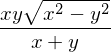

In [35]:
from sympy.printing.dot import dotprint
symstr = x * y * sqrt(x ** 2 - y ** 2) / (x + y)
symstr

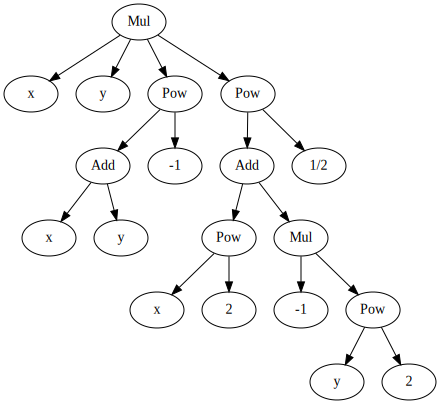

In [36]:
# 将表达式打印为dot字符串保存, 然后绘制dot图
print(dotprint(symstr),file=open('data/expression-tree.dot','w'))
dot2graph('data/expression-tree.dot')

Function自定义符号函数, 而不是创建函数符号对象

In [37]:
f = Function("f") # f仍然是一个类
f_symbol = symbols("f2",clf=Function) #符号对象
%C type(f); type(f_symbol)

               type(f)                      type(f_symbol)     
-------------------------------------  ------------------------
sympy.core.function.UndefinedFunction  sympy.core.symbol.Symbol


使用f创建一个表达式时, 就相当于创建它的一个实例

In [38]:
t = f(x, y)
t

In [39]:
%C type(t); t.func; t.args

type(t)  t.func  t.args
-------  ------  ------
f        f       (x, y)


In [40]:
t + t * t

### 通配符

使用Wild()创建通配符(通配符模板), 传递给表达式的match方法;  
match()方法返回一个字典: {通配符: 子表达式};

In [55]:
x, y = symbols("x, y")
a, b = Wild("a"),Wild("b")
(3 * x * (x + y)**2).match(a * b**2)

表达式的find()方法: 在表达式的树状结构中搜索所有与模板匹配的子树

In [42]:
expr = expand((x + y)**3)
expr

In [43]:
%%disabled
print(dotprint(expr),file=open('data/expression-tree2.dot','w'))
dot2graph('data/expression-tree2.dot')

为什么会搜索到这么多输出项

In [45]:
expr.find(a * b**2)

In [46]:
# 查看上述搜索项是如何满足搜索条件的
def find_match(expr, pattern):
    return [e.match(pattern) for e in expr.find(pattern)]

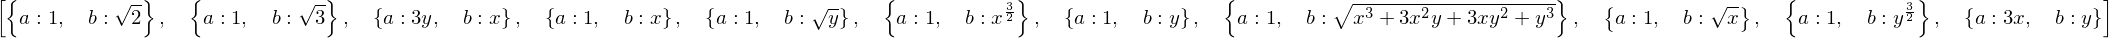

In [47]:
find_match(expr,a*b**2)

In [186]:
kk 4

**********************************************!kk4:异常>**********************************************


In [48]:
def tabulate_it(rows, cols, func, label_fmt="**{}**", row_label=True):
    from tabulate import tabulate
    result = []

    fmt = label_fmt.format

    for row in rows:
        res_row = [fmt(row)] if row_label else []
        result.append(res_row)
        for col in cols:
            res_row.append(func(row, col))
    return tabulate(result, [fmt(col) for col in cols], "pipe", numalign='left',stralign='left')

In [62]:
# 打印匹配表
def display_match_table(expr, pattern):
    from IPython.display import display_markdown, Markdown
    
    def f(row, col):
        if col == "表达式":
            return "${}$".format(latex(row[0]))
        else:
            return "${}$".format(latex(row[1]))

    c1 = expr.find(pattern)
    c2 = find_match(expr, pattern)
    display_markdown(
        Markdown(tabulate_it(zip(c1, c2), 
                 ["表达式","匹配结果"], f, row_label=False)))   

In [63]:
display_match_table(expr, a*b**2)

| **表达式**                              | **匹配结果**                                                                      |
|:----------------------------------------|:----------------------------------------------------------------------------------|
| $2$                                     | $\left \{ a : 1, \quad b : \sqrt{2}\right \}$                                     |
| $3$                                     | $\left \{ a : 1, \quad b : \sqrt{3}\right \}$                                     |
| $3 x^{2} y$                             | $\left \{ a : 3 y, \quad b : x\right \}$                                          |
| $x^{2}$                                 | $\left \{ a : 1, \quad b : x\right \}$                                            |
| $y$                                     | $\left \{ a : 1, \quad b : \sqrt{y}\right \}$                                     |
| $x^{3}$                                 | $\left \{ a : 1, \quad b : x^{\frac{3}{2}}\right \}$                              |
| $y^{2}$                                 | $\left \{ a : 1, \quad b : y\right \}$                                            |
| $x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3}$ | $\left \{ a : 1, \quad b : \sqrt{x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3}}\right \}$ |
| $x$                                     | $\left \{ a : 1, \quad b : \sqrt{x}\right \}$                                     |
| $y^{3}$                                 | $\left \{ a : 1, \quad b : y^{\frac{3}{2}}\right \}$                              |
| $3 x y^{2}$                             | $\left \{ a : 3 x, \quad b : y\right \}$                                          |

In [64]:
a = Wild("a", exclude=[1])
b = Wild("b", exclude=[1, Pow])
find_match(expr, a * b**2)

表达式替换

In [65]:
expr.replace(a * b**2, (a + b)**2)

In [66]:
expr = sqrt(x) / sin(y**2) + abs(exp(x) * x)

In [67]:
display_match_table(expr, f)

| **表达式**   | **匹配结果**   |
||

In [68]:
find_match(expr, f)

In [69]:
kk 2

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$!kk2:终止>$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
